In [1]:
# apply kmeans to iris dataset with different number of clusters

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets

In [3]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

scaler = StandardScaler()
x_scaled=scaler.fit_transform(X)

In [4]:
k_means=KMeans(n_clusters=5,random_state=115)

# kmeans model
%timeit k_means.fit(x_scaled)
y_pred = k_means.predict(x_scaled)

20.5 ms ± 467 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


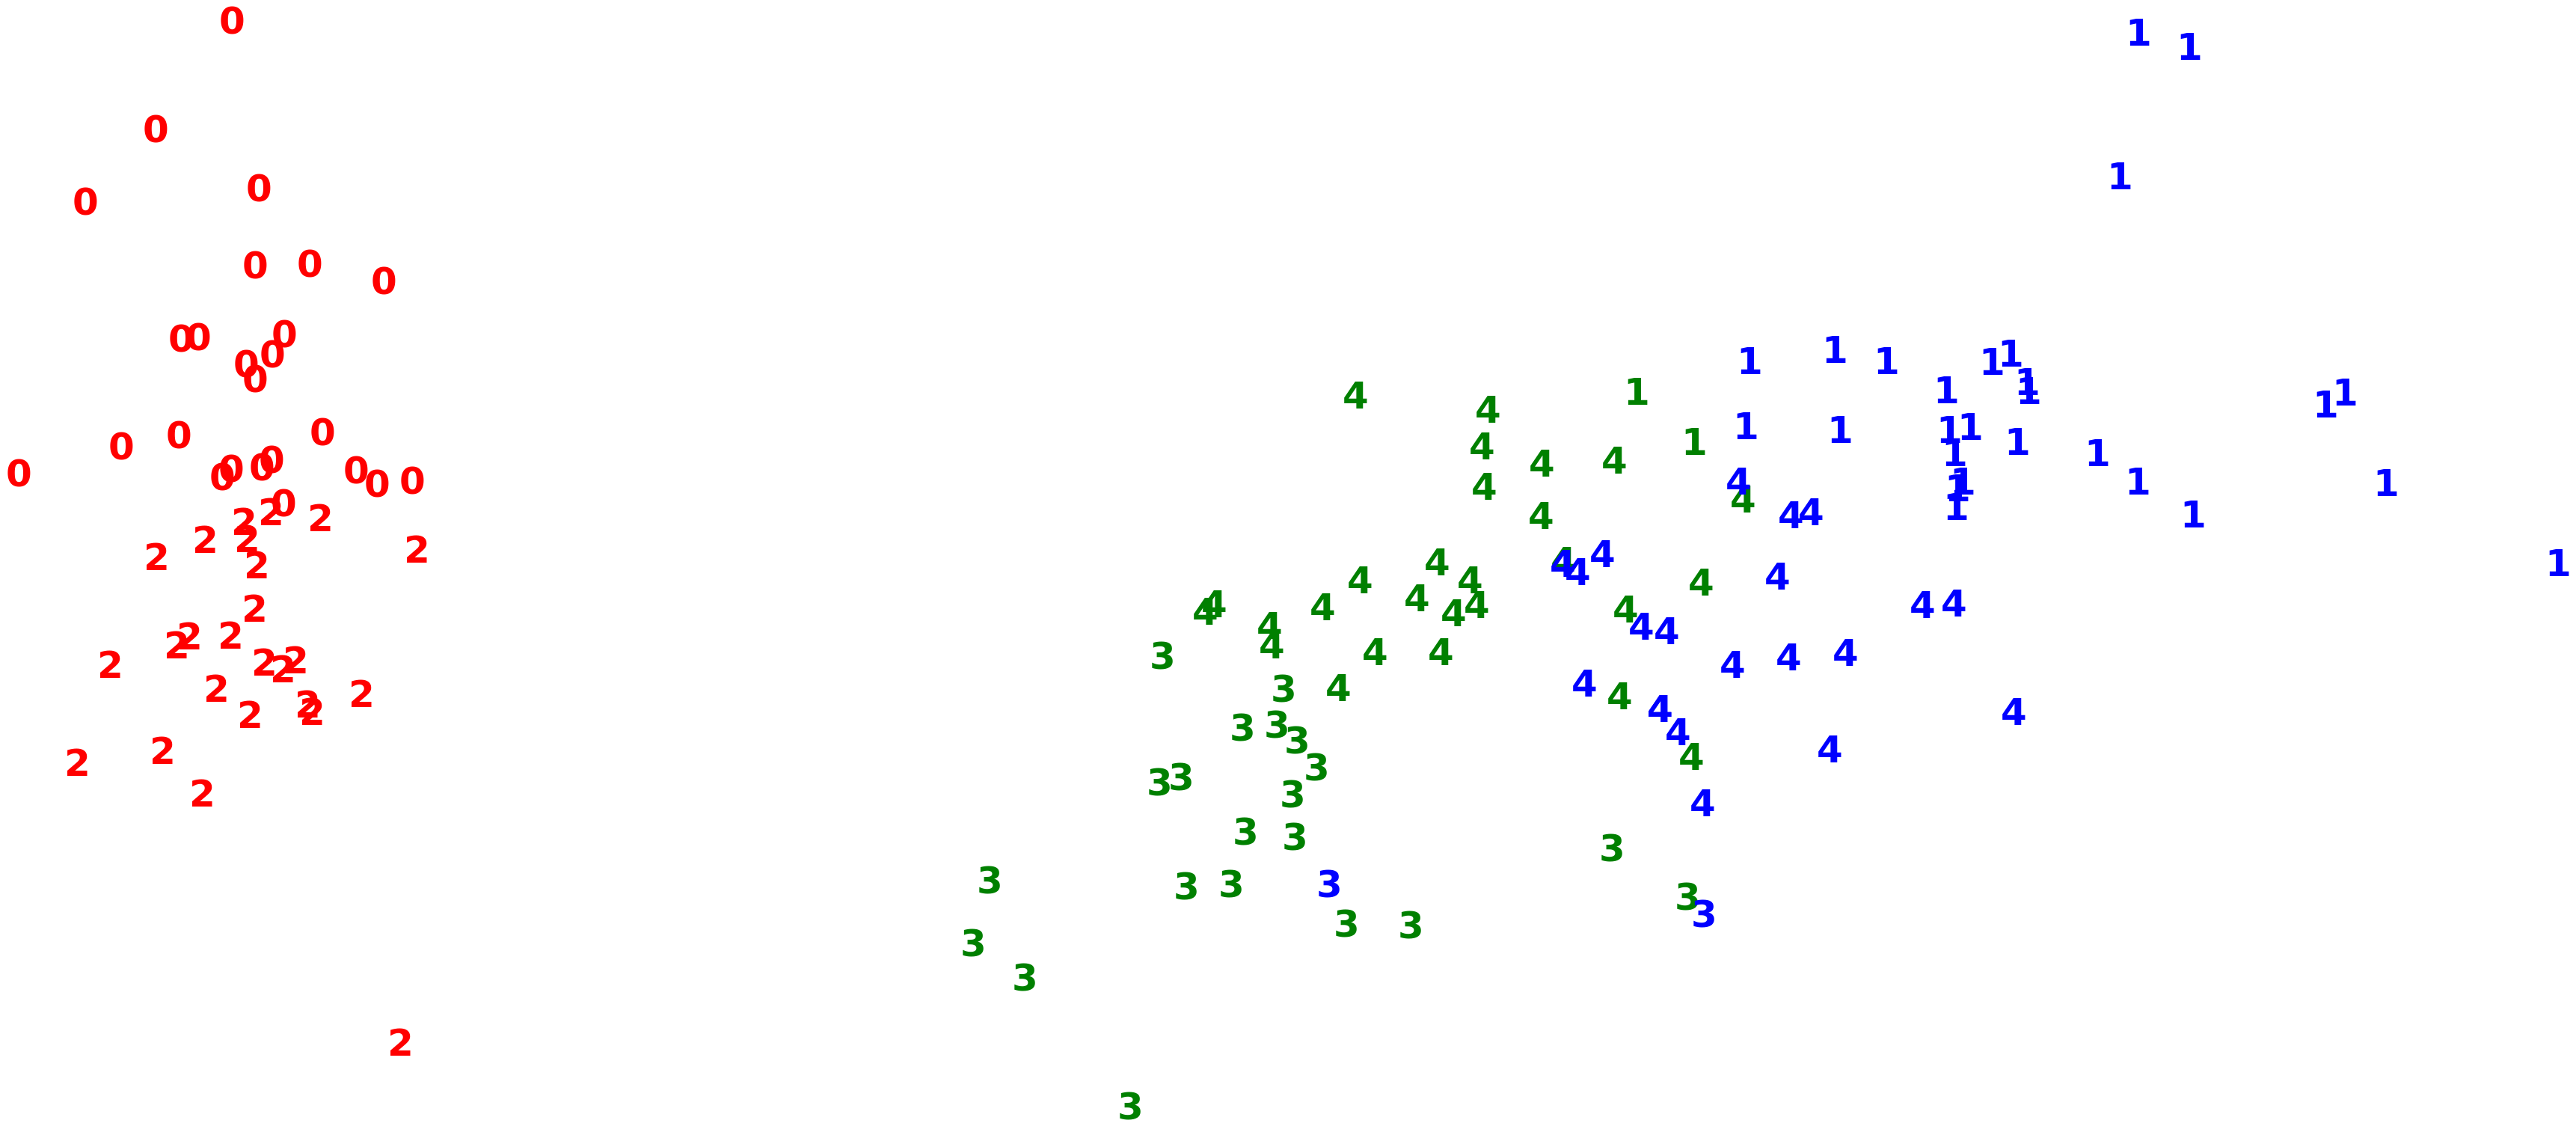

In [5]:
# in order to visualize the iris data kmeans result, I have to do dimension reduction 
# to reduce the dimension down to two
pca=PCA(n_components=2).fit_transform(x_scaled)
plt.figure(figsize=(10,5))
colors='rgb'
pca.shape

for i in range(pca.shape[0]):
    plt.text(pca[i,0],pca[i,1],str(y_pred[i]),color=colors[y[i]],
    fontdict={'weight':'bold','size': 50})
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


24.7 ms ± 5.99 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


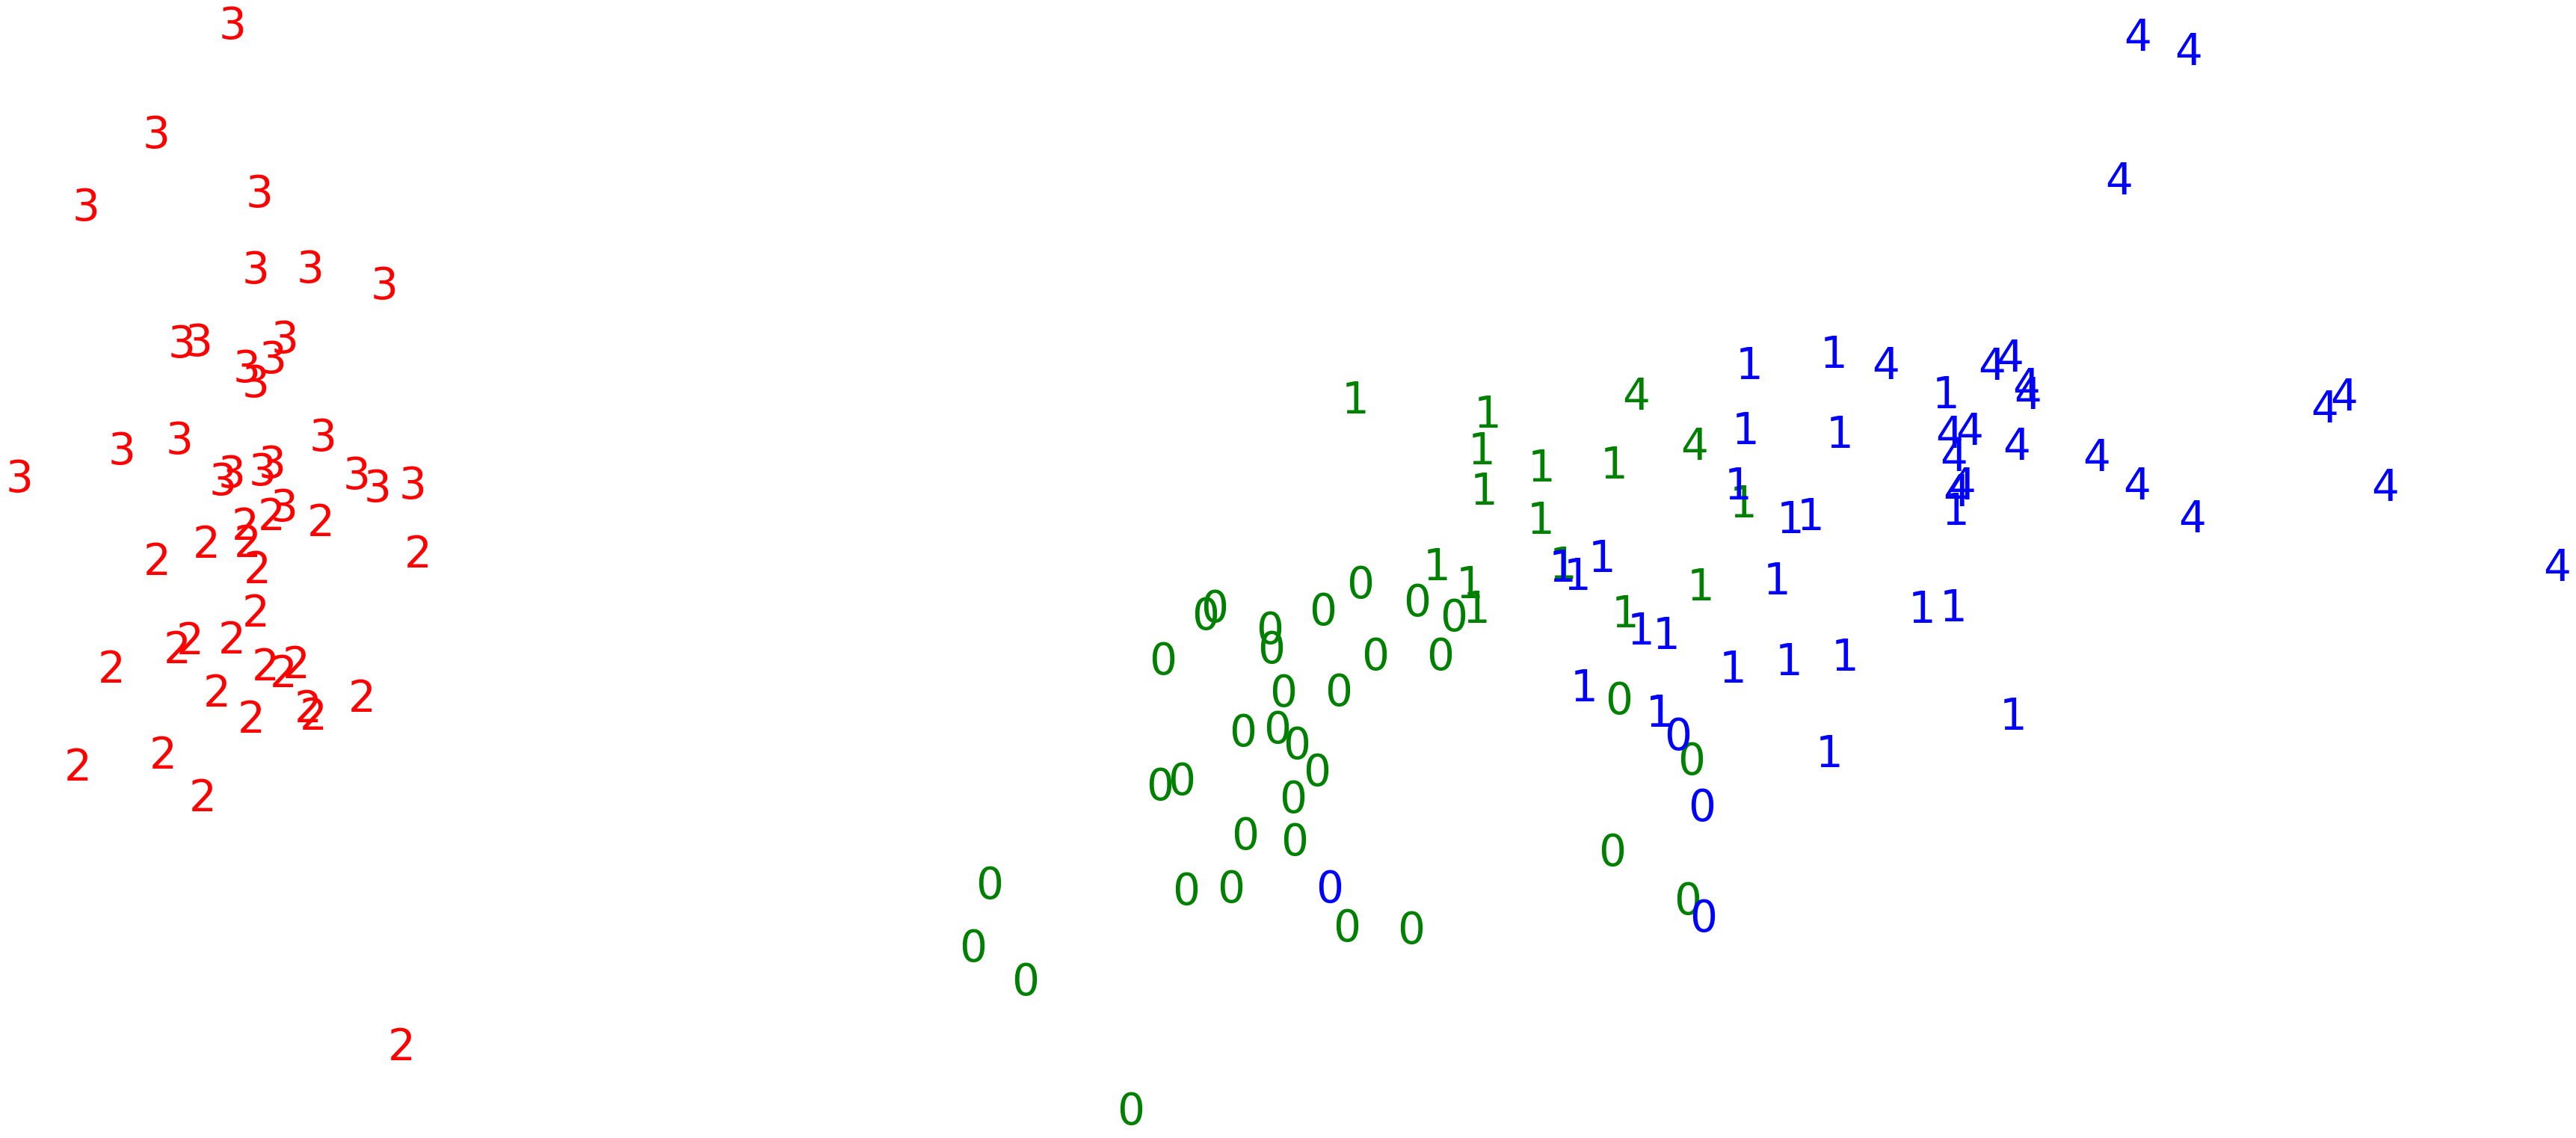

In [6]:
# apply mini-batch
minikmeans_cluster=MiniBatchKMeans(init='random',n_clusters=5,batch_size=50)

%timeit minikmeans_cluster.fit(x_scaled)
minikmeans_cluster=minikmeans_cluster.predict(x_scaled)

plt.figure(figsize=(10,5))
colors='rgb'
for i in range(pca.shape[0]):
    plt.text(pca[i,0],pca[i,1],str(minikmeans_cluster[i]),color=colors[y[i]],fontdict={'weight':'normal','size': 58})
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()